## Predict Cryptography Algorithms based on Cipertext

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load dataset
df = pd.read_csv('data/cryptography_dataset_processed.csv')  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Algorithm                  120000 non-null  object 
 1   Key                        120000 non-null  object 
 2   Ciphertext                 120000 non-null  object 
 3   Key Length (bits)          120000 non-null  float64
 4   Ciphertext Length (bytes)  120000 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


In [3]:
# Display first few rows
df.head()

,Algorithm,Key,Ciphertext,Key Length (bits),Ciphertext Length (bytes)
0,AES,ef7d8f79011629e953bf4f7738317bb5,5bff23c6f03e37c1,0.036866,0.000000
1,DES,3453d3b1750432cf,b1366a30a0c3b8f68093c601b061180d,0.000000,0.032258
2,Triple DES,df3445340794dcce3d07bcc1ad375ece524ab5d001073b08,c0917f1c9df3d9b3965ac26779314db5,0.073733,0.032258
3,RSA,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,c20b03112d92b17d2daaac7e868fd6b697f436a03f8dbb...,1.000000,1.000000
4,Blowfish,1db0711ab8922217c4bf74c613073d8c,428aba00a39ee506e87c1b2924e8e219,0.036866,0.032258


#### Preprocess the data

In [4]:
# Extract features (ciphertext and key lengths) and target labels (algorithm type)
X = df.drop(columns=['Algorithm'])  # Features
y = df['Algorithm']  # Target (cryptographic algorithm)

# Convert the textual ciphertext to numerical data 
def hash_ciphertext(ciphertext):
    return sum([ord(c) for c in str(ciphertext)])

X['Ciphertext_hashed'] = X['Ciphertext'].apply(hash_ciphertext)

# Drop the original 'Ciphertext' column as it is now numerically represented
X = X.drop(columns=['Ciphertext'])

# Label Encoding for target variable (Algorithm)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check and ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Force all columns to be numeric

# Handle any missing values
X.fillna(0, inplace=True)

# Feature Scaling (Standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

Accuracy: 73.92%


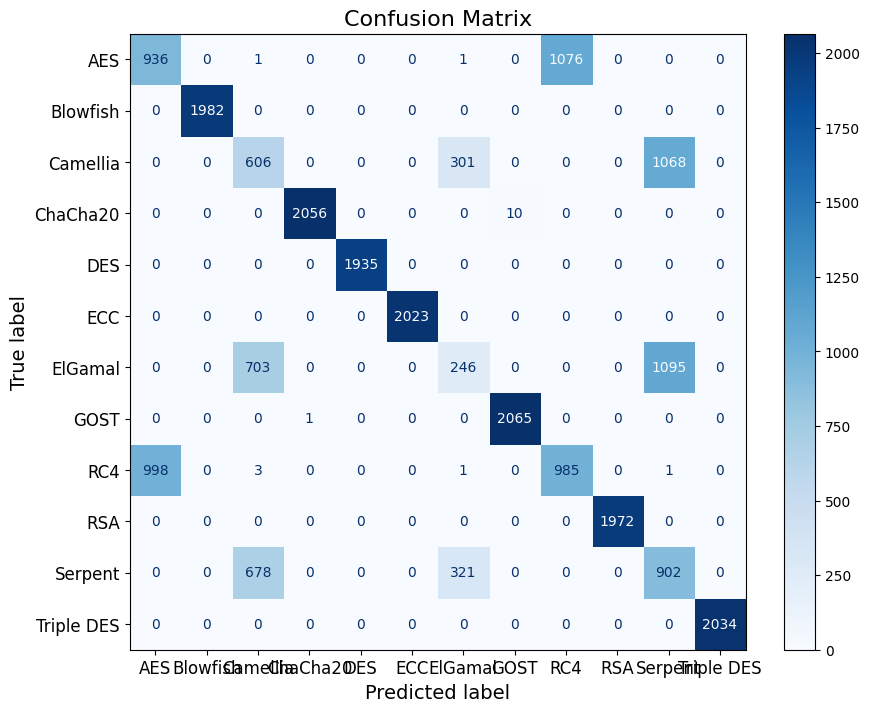

In [5]:
# Model Building (RandomForest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Displaying the Confusion Matrix 
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
cm_display.plot(cmap='Blues', ax=ax)  # Use the same colormap
plt.title("Confusion Matrix", fontsize=16)

# Adjust the font size for labels
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)

# Increase font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Epoch 1/20


c:\Users\Jun Sheng\OneDrive\Desktop\SC4010\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6350 - loss: 0.7760 - val_accuracy: 0.7114 - val_loss: 0.5458
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7158 - loss: 0.5120 - val_accuracy: 0.7421 - val_loss: 0.4436
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7362 - loss: 0.4571 - val_accuracy: 0.7422 - val_loss: 0.4350
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7408 - loss: 0.4410 - val_accuracy: 0.7280 - val_loss: 0.4558
Epoch 5/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7423 - loss: 0.4374 - val_accuracy: 0.7504 - val_loss: 0.4350
Epoch 6/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7412 - loss: 0.4300 - val_accuracy: 0.7454 - val_loss: 0.4110
Epoch 7/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7423 - loss: 0.4279 - val_accuracy: 0.7522 - val_loss: 0.4079
Epoch 8/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7441 - loss: 0.4258 - val_accurac

Text(0, 0.5, 'True label')

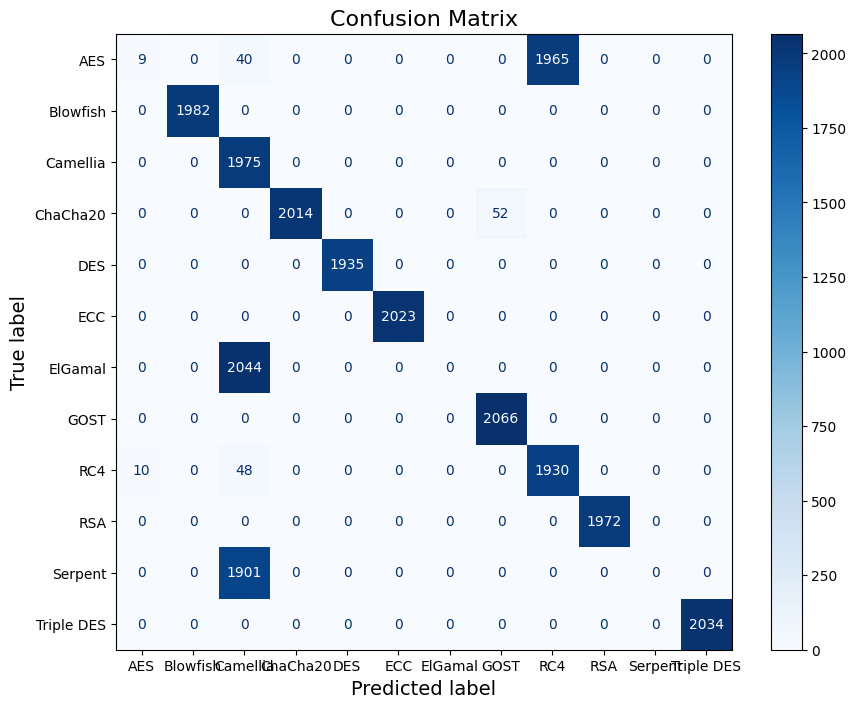

In [ ]:
# Building the Neural Network Model (Feedforward)
model = Sequential()

# Input layer (first hidden layer)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

# Hidden layer 1
model.add(Dense(64, activation='relu'))

# Hidden layer 2
model.add(Dense(32, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Number of output classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Making Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Displaying the Confusion Matrix 
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
cm_display.plot(cmap='Blues', ax=ax)  # Use the same colormap
plt.title("Confusion Matrix", fontsize=16)

# Adjust the font size for labels
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)

#### Now lets take out the 'Key Length (bits)' from the data as Attackers usually only know the cipertext

In [7]:
# Extract features (ciphertext and key lengths) and target labels (algorithm type)
X = df.drop(columns=['Algorithm', 'Key Length (bits)'])  # Features
y = df['Algorithm']  # Target (cryptographic algorithm)

# Convert the textual ciphertext to numerical data 
def hash_ciphertext(ciphertext):
    return sum([ord(c) for c in str(ciphertext)])

X['Ciphertext_hashed'] = X['Ciphertext'].apply(hash_ciphertext)

# Drop the original 'Ciphertext' column as it is now numerically represented
X = X.drop(columns=['Ciphertext'])

# Label Encoding for target variable (Algorithm)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check and ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Force all columns to be numeric

# Handle any missing values
X.fillna(0, inplace=True)

# Feature Scaling (Standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

Accuracy: 31.86%


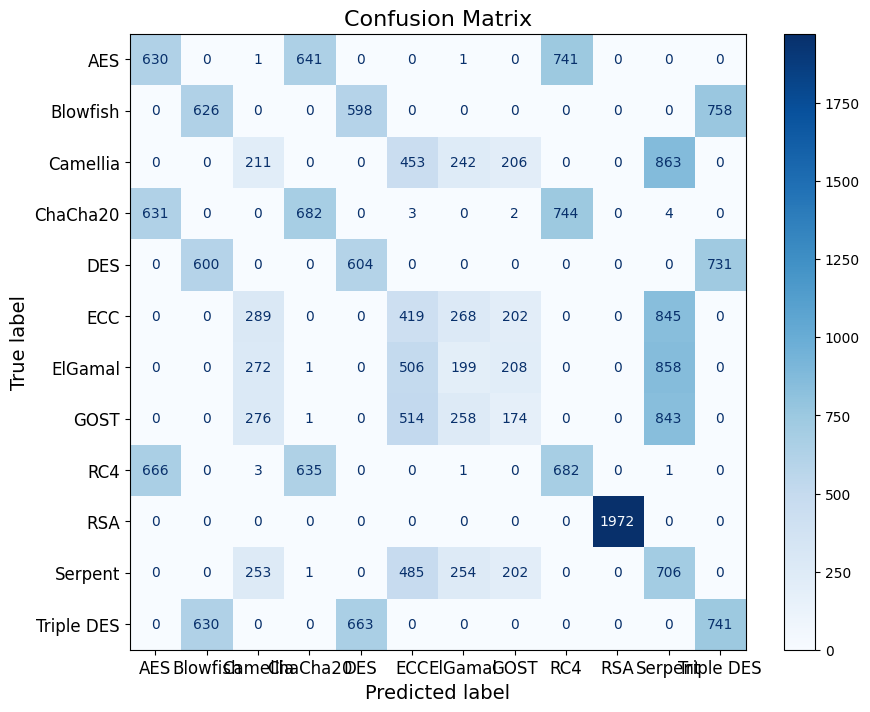

In [8]:
# Model Building (RandomForest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Displaying the Confusion Matrix 
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
cm_display.plot(cmap='Blues', ax=ax)  # Use the same colormap
plt.title("Confusion Matrix", fontsize=16)

# Adjust the font size for labels
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)

# Increase font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Epoch 1/20


c:\Users\Jun Sheng\OneDrive\Desktop\SC4010\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3047 - loss: 1.4866 - val_accuracy: 0.3292 - val_loss: 1.3058
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3307 - loss: 1.2829 - val_accuracy: 0.3262 - val_loss: 1.2829
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3312 - loss: 1.2660 - val_accuracy: 0.3370 - val_loss: 1.2574
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3315 - loss: 1.2589 - val_accuracy: 0.3288 - val_loss: 1.2562
Epoch 5/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3321 - loss: 1.2546 - val_accuracy: 0.3342 - val_loss: 1.2663
Epoch 6/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3311 - loss: 1.2538 - val_accuracy: 0.3316 - val_loss: 1.2439
Epoch 7/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3318 - loss: 1.2493 - val_accuracy: 0.3268 - val_loss: 1.2394
Epoch 8/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3311 - loss: 1.2463 - val_accurac

Text(0, 0.5, 'True label')

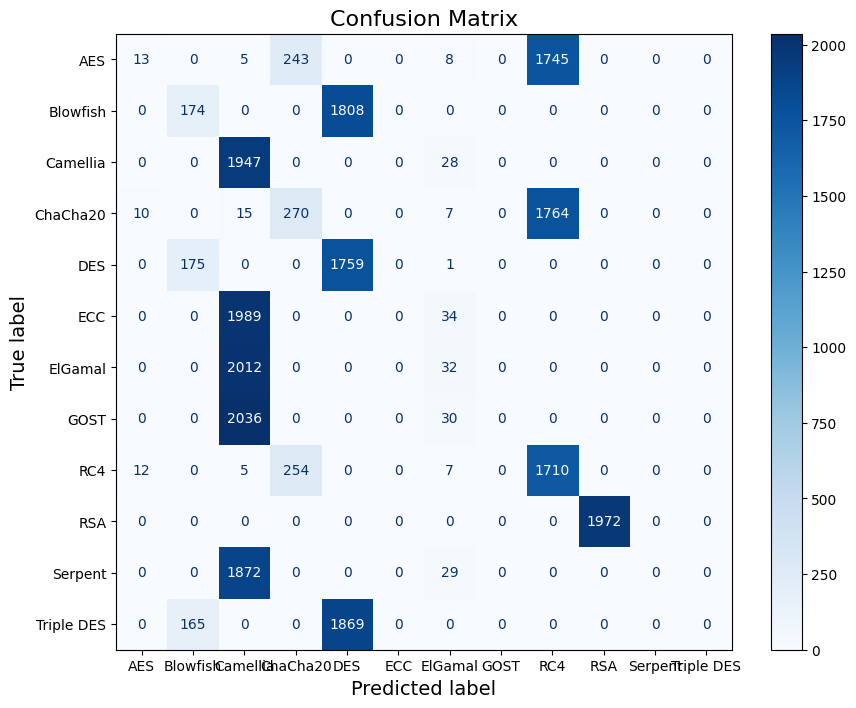

In [9]:
# Building the Neural Network Model (Feedforward)
model = Sequential()

# Input layer (first hidden layer)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

# Hidden layer 1
model.add(Dense(64, activation='relu'))

# Hidden layer 2
model.add(Dense(32, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Number of output classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Making Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Displaying the Confusion Matrix 
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
cm_display.plot(cmap='Blues', ax=ax)  # Use the same colormap
plt.title("Confusion Matrix", fontsize=16)

# Adjust the font size for labels
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
